![insomnia](insomnia.jpg)


Your client, SleepInc, has shared anonymized sleep data from their hot new sleep tracking app SleepScope. As their data science consultant, your mission is to analyze the lifestyle survey data with Python to discover relationships between exercise, gender, occupation, and sleep quality. See if you can identify patterns leading to insights on sleep quality.

## 💾 The data: sleep_health_data.csv

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months. The data is saved as `sleep_health_data.csv`.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

In [1]:
# Start coding here
# Use as many cells as you need
import pandas as pd

In [2]:
# Reading the Data frame
df = pd.read_csv('sleep_health_data.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [126]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None
(374, 13)


In [127]:
#1- Find occupation with the lowest sleep duration.
df.groupby("Occupation")["Sleep Duration"].mean().sort_values(ascending= True)

Occupation
Sales Representative    5.900000
Scientist               6.000000
Salesperson             6.403125
Teacher                 6.690000
Software Engineer       6.750000
Manager                 6.900000
Doctor                  6.970423
Nurse                   7.063014
Accountant              7.113514
Lawyer                  7.410638
Engineer                7.987302
Name: Sleep Duration, dtype: float64

In [3]:
lowest_sleep_duration_occ = df.groupby("Occupation")["Sleep Duration"].mean().sort_values().index[0]
lowest_sleep_duration_occ

'Sales Representative'

In [4]:
#2- Find occupation with the lowest sleep quality.
lowest_sleep_quality_occ = df.groupby("Occupation")["Quality of Sleep"].mean().sort_values(ascending= True)
lowest_sleep_quality_occ.head()

Occupation
Sales Representative    4.000000
Scientist               5.000000
Salesperson             6.000000
Software Engineer       6.500000
Doctor                  6.647887
Name: Quality of Sleep, dtype: float64

In [5]:
lowest_sleep_quality_occ = df.groupby("Occupation")["Quality of Sleep"].mean().sort_values().index[0]
lowest_sleep_quality_occ

'Sales Representative'

In [6]:
# Compare occupation with the least sleep to occupation with the lowest sleep quality
if lowest_sleep_quality_occ == lowest_sleep_duration_occ:
    same_occ = True
else:
    same_occ = False
print(same_occ)

True


In [132]:
df["BMI Category"].value_counts(normalize = True)

Normal        0.577540
Overweight    0.395722
Obese         0.026738
Name: BMI Category, dtype: float64

In [133]:
df["Sleep Disorder"].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [134]:
#Filter the dataframe to get Insomnia Patients
df_insomnia = df[df["Sleep Disorder"] == 'Insomnia' ]
df_insomnia.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
18,19,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,Insomnia
31,32,Female,30,Nurse,6.4,5,35,7,Normal,130/86,78,4100,Insomnia
67,68,Male,33,Doctor,6.0,6,30,8,Normal,125/80,72,5000,Insomnia


In [135]:
df_insomnia.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.00000,77.000000,77.000000
mean,216.272727,43.519481,6.589610,6.532468,46.818182,5.87013,70.467532,5901.298701
std,65.982581,4.808464,0.387157,0.804337,11.751514,1.46315,4.948643,1000.328039
min,6.000000,28.000000,5.900000,4.000000,30.000000,3.00000,65.000000,3000.000000
25%,195.000000,43.000000,6.400000,6.000000,45.000000,4.00000,65.000000,6000.000000
50%,231.000000,44.000000,6.500000,7.000000,45.000000,7.00000,72.000000,6000.000000
75%,252.000000,45.000000,6.600000,7.000000,45.000000,7.00000,72.000000,6000.000000
max,316.000000,53.000000,8.300000,9.000000,90.000000,8.00000,85.000000,10000.000000


In [136]:
df_insomnia.groupby(by = "BMI Category" ).count()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
BMI Category,,,,,,,,,,,,
Normal,9,9,9,9,9,9,9,9,9,9,9,9
Obese,4,4,4,4,4,4,4,4,4,4,4,4
Overweight,64,64,64,64,64,64,64,64,64,64,64,64


In [137]:
# Calculate the ratio of app users in each BMI category have been diagnosed with Insomnia.
df_insomnia["BMI Category"].value_counts(normalize = True)

Overweight    0.831169
Normal        0.116883
Obese         0.051948
Name: BMI Category, dtype: float64

In [138]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [139]:
#getting All Normal BMI in the dataframe
df_normal = len(df[df["BMI Category"]== "Normal"])
df_normal

216

In [140]:
# Calculate normal insomnia ratio
normal_insomnia_ratio = round(len(df_insomnia[df_insomnia["BMI Category"] == "Normal"]) / df_normal , 2 )
normal_insomnia_ratio

0.04

In [141]:
#getting All Overweight BMI in the dataframe
df_overweight = len(df[df["BMI Category"]== "Overweight"])
df_overweight

148

In [142]:
# Calculate overweight insomnia ratio 
overweight_insomnia_ratio = round(len(df_insomnia[df_insomnia["BMI Category"] == "Overweight"]) / df_overweight , 2 )
overweight_insomnia_ratio

0.43

In [143]:
#obese
df_obese = len(df[df["BMI Category"]== "Obese"])
df_obese

10

In [144]:
obese_insomnia_ratio = round(len(df_insomnia[df_insomnia["BMI Category"] == "Obese"]) / df_obese , 2 )
obese_insomnia_ratio

0.4

In [145]:
bmi_insomnia_ratios = {
    "Normal" : normal_insomnia_ratio,
    "Overweight": overweight_insomnia_ratio,
    "Obese" :obese_insomnia_ratio
}

In [11]:
df[df["Quality of Sleep"] > 5].head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [8]:
df_sleep_quality  =df.groupby("Occupation")["Quality of Sleep"].agg(['mean', 'std'])
df_sleep_quality

,mean,std
Occupation,,
Accountant,7.891892,0.458487
Doctor,6.647887,0.757790
Engineer,8.412698,0.754234
Lawyer,7.893617,0.311661
Manager,7.000000,NaN
Nurse,7.369863,1.550151
Sales Representative,4.000000,0.000000
Salesperson,6.000000,0.000000
Scientist,5.000000,1.154701


In [22]:
df_sleep_quality.dtypes

mean    float64
std     float64
dtype: object

In [23]:
df_sleep_quality = pd.DataFrame(df_sleep_quality)

In [28]:
df_sleep_quality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Accountant to Teacher
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    11 non-null     float64
 1   std     10 non-null     float64
dtypes: float64(2)
memory usage: 264.0+ bytes


In [31]:
df_sleep_quality[df_sleep_quality["mean"] == df_sleep_quality["mean"].min()]

,mean,std
Occupation,,
Sales Representative,4.0,0.0


<Axes: ylabel='Occupation'>

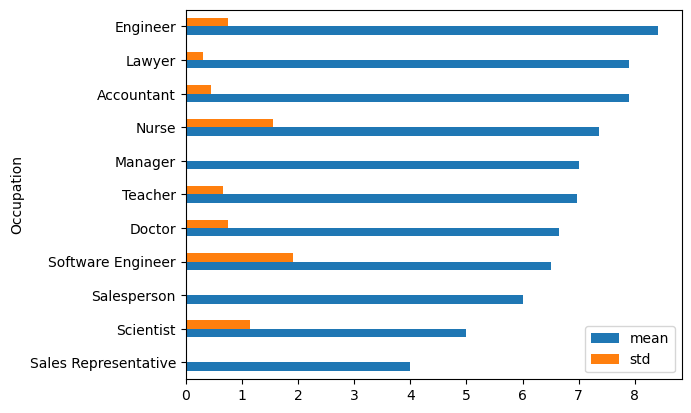

In [35]:
df_sleep_quality.sort_values(by = "mean").plot.barh()

In [36]:
df_test = df[["Occupation", "BMI Category"]]
df_test.head()

,Occupation,BMI Category
0,Software Engineer,Overweight
1,Doctor,Normal
2,Doctor,Normal
3,Sales Representative,Obese
4,Sales Representative,Obese


In [37]:
df_test["BMI"] = df_test["BMI Category"].apply(lambda x : 1 if x == "Normal" else 2 if x == "Overweight" else 3 )

C:\Users\Amira Salama\AppData\Local\Temp\ipykernel_23548\1770258800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["BMI"] = df_test["BMI Category"].apply(lambda x : 1 if x == "Normal" else 2 if x == "Overweight" else 3 )


In [39]:
df_test.head()

,Occupation,BMI Category,BMI
0,Software Engineer,Overweight,2
1,Doctor,Normal,1
2,Doctor,Normal,1
3,Sales Representative,Obese,3
4,Sales Representative,Obese,3


In [40]:
df["BMI"] = df["BMI Category"].map({"Normal" :1 ,
                            "Overweight" :2 ,
                            "Obese":3 }
    )

In [41]:
df["BMI"].head()

0    2
1    1
2    1
3    3
4    3
Name: BMI, dtype: int64

In [44]:
df[df["BMI"] == 3].shape[0]

10

In [48]:
df.duplicated().any()

np.False_